## Bagging and Random Forest Models

Using **ensemble methods** can greatly improve the results achieved with weak machine learning algorithms, also called **weak learners**. Ensemble methods achieve better performance by aggregating the results of many statistically independent models. This process averages out the errors and produces a final better prediction. 

**Bootstrap aggregating** or simply **bagging**. Bagging follows a simple procedure:
1. N learners (machine learning models) are defined. 
2. N subsamples of the training data are created by **Bernoulli sampling with replacement**.
3. The N learners are trained on the subsamples of the training data.
4. The ensemble is scored by averaging, or taking a majority vote, of the predictions from the N learners.

**Classification and regression tree models** are most typically used with bagging methods. The most common such algorithm is know as the **random forest**. The random forest method is highly scalable and generally produces good results, even for complex problems. 

Classification and regression trees tend to be robust to noise or outliers in the training data. This is true for the random forest algorithm as well. 

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


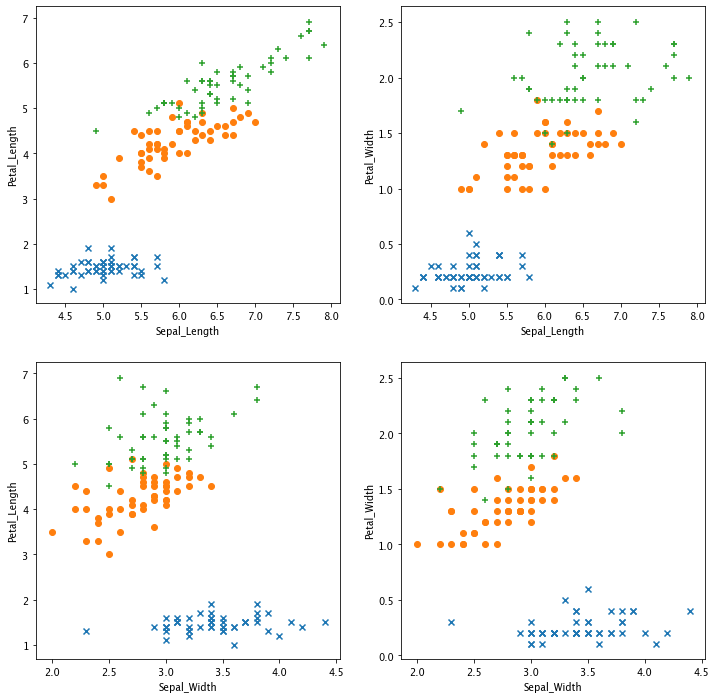

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
# Import the dataset from sklearn.datasets
iris = datasets.load_iris()

# Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species
print(iris.head())

# Plot views of the iris data            
plot_iris(iris) 

In [38]:
# Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label
# Creates a numpy array of the features.
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
# Numerically codes the label using a dictionary lookup, and converts it to a numpy array
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

# Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

# Numeric features must be scaled, the training features are scaled using the transform method
scale = preprocessing.StandardScaler()
scale.fit(X_train)
# print(X_train)
X_train = scale.transform(X_train)
# print(X_train)


In [39]:
## Evaluate the model
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    # Compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    

def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    # Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    # Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    # Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])


                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               30                 4
Actual Vriginica        0                2                29

Accuracy        0.94
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.94       0.88
Recall      1.00      0.88       0.94
F1          1.00      0.91       0.91


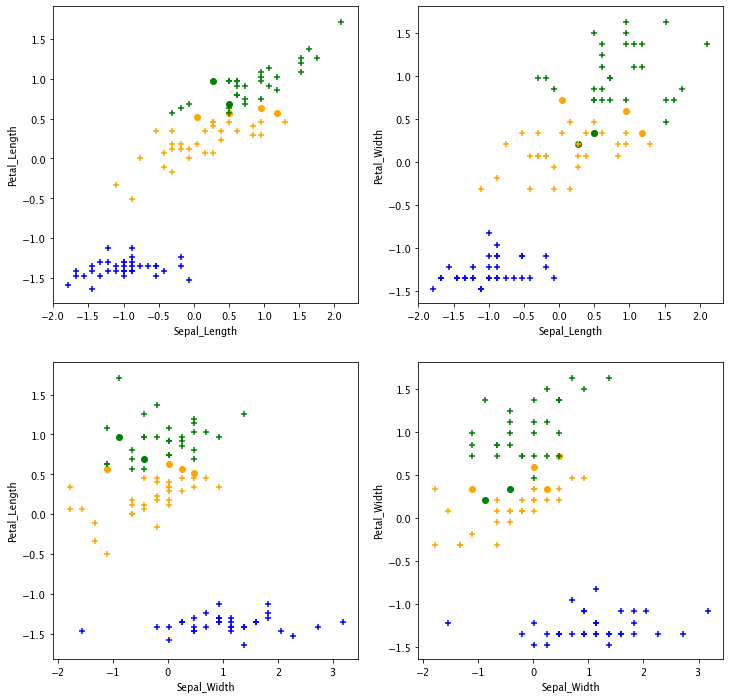

In [40]:
# Define random forest model with 5 trees using the RandomForestClassifer and fit the model
nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

X_test = scale.transform(X_test)
scores = rf_clf.predict(X_test)
    
print_metrics_3(y_test, scores)  
plot_iris_score(X_test, y_test, scores)

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               32                 2
Actual Vriginica        0                3                28

Accuracy        0.95
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.91       0.93
Recall      1.00      0.94       0.90
F1          1.00      0.93       0.92


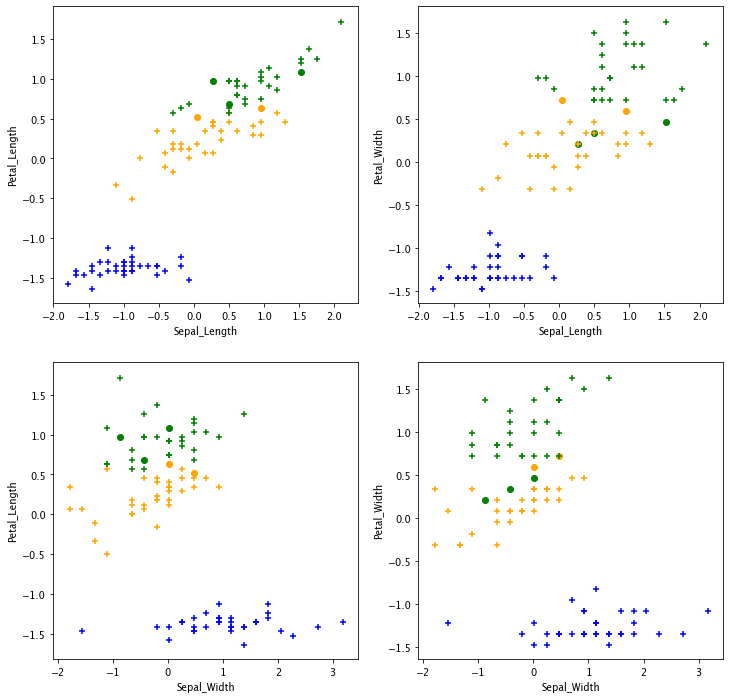

In [41]:
# Define random forest model with 40 trees using the RandomForestClassifer and fit the model

nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=40)
rf_clf.fit(X_train, y_train)
scores = rf_clf.predict(X_test)
print_metrics_3(y_test, scores) 
plot_iris_score(X_test, y_test, scores)

Text(0, 0.5, 'Feature importance')

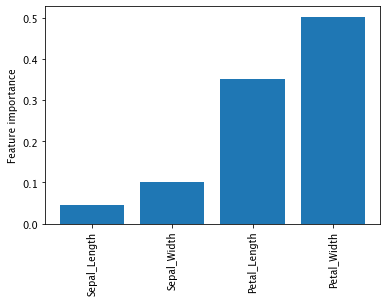

In [42]:
# Random forest models have a nice property that feature importance is computed during model training. 
# Feature importance can be used as a feature selection method.
importance = rf_clf.feature_importances_
plt.bar(range(4), importance, tick_label = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

# Notice that the Speal_Lenght and Sepal_Width have rather low importance.

In [43]:
## Create reduced feature set
Features = np.array(iris[['Petal_Length', 'Petal_Width']])

## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=40)
rf_clf.fit(X_train, y_train)
scores = rf_clf.predict(X_test)
print_metrics_3(y_test, scores) 

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               30                 4
Actual Vriginica        0                1                30

Accuracy        0.95
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.97       0.88
Recall      1.00      0.88       0.97
F1          1.00      0.92       0.92


### Another example

1. In this case, a grid of two hyperparameters is searched: 
  - max_features determines the maximum number of features used to determine the splits. Minimizing the number of features can prevent model over-fitted by induces bias. 
  - min_samples_leaf determines the minimum number of samples or leaves which must be on each terminal node of the tree. Maintaining the minimum number of samples per terminal node is a regularization method. Having too few samples on terminal leaves allows the model training to memorize the data, leading to high variance. Forcing too many samples on the terminal nodes leads to biased predictions. 
2. Since there is a class imbalance and a difference in the cost to the bank of misclassification of a bad credit risk customer, the "balanced" argument is used. The balanced argument ensures that the subsamples used to train each tree have balanced cases. 
3. The model is fit on each set of hyperparameters from the grid. 
4. The best estimated hyperparameters are printed. 

In [ ]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
#print(Features.shape)
#print(Labels.shape)

nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle=True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle=True)

# Nested cross validation is used to estimate the optimal hyperparameters 
# and perform model selection for the random forest model
param_grid = {'max_features': [2, 3, 5, 10, 15], "min_samples_leaf":[3, 5, 10, 20]}

# Define a random forest model
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight='balanced') # class_weight = {0:0.33, 1:0.67}) 

# Perform the grid search over the parameters -- inner cross validation
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                        cv=inside,  # use the inside folds
                        scoring='roc_auc',
                        return_train_score=True)
rf_clf.fit(Features, Labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

3
10


In [ ]:
# Outer cross validation
nr.seed(498)
cv_estimate = ms.cross_val_score(rf_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
## Build and test a model using the estimated optimal hyperparameters

# Randomly sample cases to create independent training and test data
nr.seed(1115)
index = range(Features.shape[0])
index = ms.train_test_split(index, test_size=300)
X_train = Features[index[0], :]
y_train = np.ravel(Labels[index[0]])
X_test = Features[index[1], :]
y_test = np.ravel(Labels[index[1]])

# Defines a random forest model object using the estimated optimal model hyperparameters 
# and then fits the model to the training data
nr.seed(1155)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = rf_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

## Summary

1. Used a random forest model to classify the cases of the iris data. A model with more trees had marginally lower error rates, but likely not significantly different.
2. Applied feature importance was used for feature selection with the iris data. The model created and evaluated with the reduced feature set had essentially the same performance as the model with more features.  
2. Used 10 fold to find estimated optimal hyperparameters for a random forest model to classify credit risk cases. The model appears to generalize well.  